In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
ddir = 'C:/crs/proj/2023_NCB_recovery/'


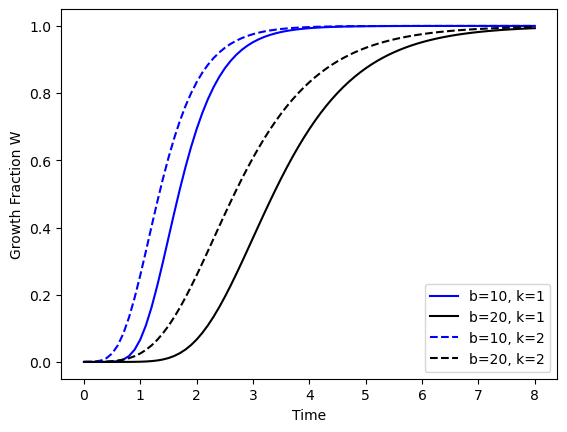

In [4]:
def gf( A, b, k, t):
    W = np.exp( np.log(A)-b*np.exp(-k*t))
    return W

A = 1
b=20
k=2
dt = .1
tmax = 8.
t = np.arange(0., tmax+dt, dt)

W1 = gf(A, b, k, t)
W2 = gf(A, b, k/2, t)
W3 = gf(A, b/2, k, t)
W4 = gf(A, b/2, k/2, t)
plt.plot(t,W1,'-',c='b',label='b=10, k=1')
plt.plot(t,W2,'-',c='k',label='b=20, k=1')
plt.plot(t,W3,'--',c='b',label='b=10, k=2')
plt.plot(t,W4,'--',c='k',label='b=20, k=2')


plt.ylabel('Growth Fraction W')
plt.xlabel('Time')
plt.legend()

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

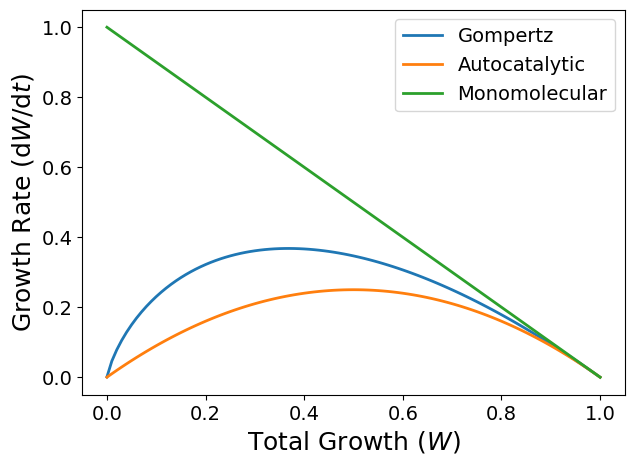

In [6]:
A=1
k=1
W = np.arange(0,1.01,.01)
W[0]=1e-4
gompertzc = k*W*(np.log(A/W))
autocat = k*W*(A-W)/A
monomol = k*(A-W)

fig = plt.figure(figsize=(7,5))
plt.plot(W,gompertzc,linewidth=2,label='Gompertz')
plt.plot(W,autocat,linewidth=2,label='Autocatalytic')
plt.plot(W,monomol,linewidth=2,label='Monomolecular')
plt.legend(fontsize=14)
plt.xlabel('Total Growth ($W$)',fontsize=18)
plt.ylabel('Growth Rate (d$W$/d$t$)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig(ddir+'various_growth_cures.png',dpi=200,bbox_inches='tight')

2.766706197476765e-09
[35] [3.5] [0.99163654]


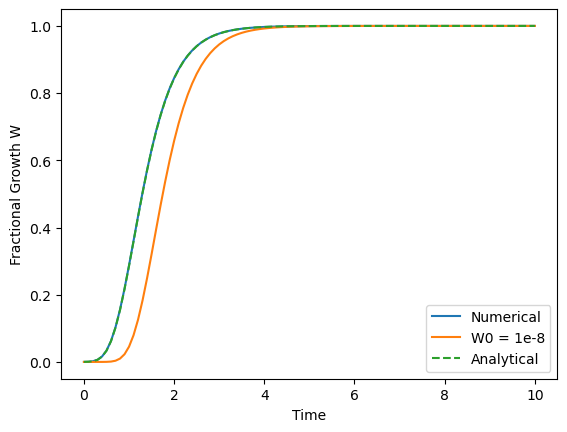

In [11]:
def gompertz(W,t,k=1,A=1):
    dWdt = k*W*(np.log(A/W))
    return dWdt

k=2
A=1
t=np.linspace(0, 10, 101)
W0 = 1e-4
W = np.squeeze( odeint(gompertz, W0, t, args=(k, A)) ) 
b=9.25
k=2
A=1
t=np.linspace(0, 10, 101)
W0 = 1e-10
W2 = np.squeeze( odeint(gompertz, W0, t, args=(k, A)) ) 
b=9.25
Wa = A*np.exp(-b*np.exp(-k*t))

plt.plot(t,W,label='Numerical')
plt.plot(t,W2,label='W0 = 1e-8')
plt.plot(t,Wa,'--',label='Analytical')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Fractional Growth W')
print(np.max( (Wa-W.T) ))
i99 = np.argwhere(W>=.99)[0]
print(i99,t[i99],W[i99])

[26.50644104  0.88779165 13.30785258 27.28226346 35.76991423 15.06548446
  4.9708687  16.38624776 12.76734291 24.6020799  22.38502798  5.35084278
 28.93304672 10.91471336 20.19094511 23.5480006  13.16179135 17.33931056
 22.00860611 10.53177766]
[2.9506441  0.38877916 1.63078526 3.02822635 3.87699142 1.80654845
 0.79708687 1.93862478 1.57673429 2.76020799 2.5385028  0.83508428
 3.19330467 1.39147134 2.31909451 2.65480006 1.61617913 2.03393106
 2.50086061 1.35317777]


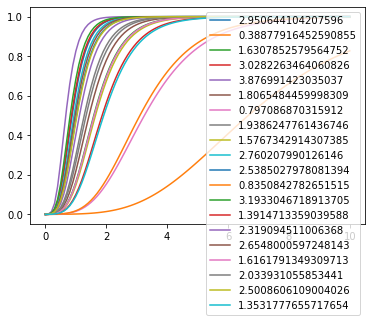

In [6]:
thick = np.random.normal(loc=20.0, scale=10.0, size=20)
print(thick)

kt = .3+thick/10.
print(kt)

for kti in kt:
    ts = '{}'.format(kti)
    plt.plot(t, A*np.exp(-b*np.exp(-kti*t)),label=ts)
             
plt.legend()
    

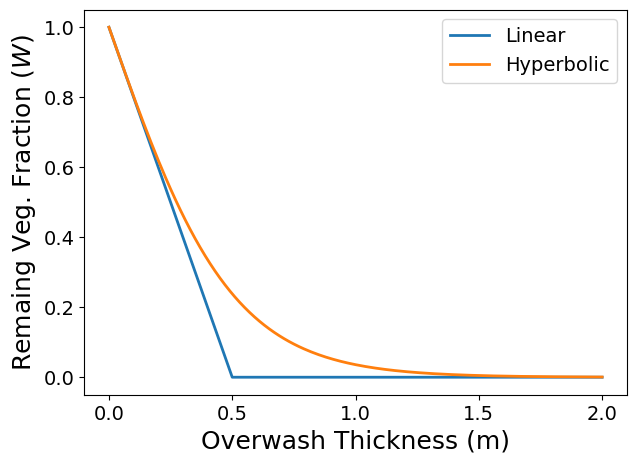

In [21]:
max_thick = 50
def W_thick(thick, Wmin=1.e-4, max_thick=100.):
    Wt = 1.-thick/max_thick
    Wt[Wt<=Wmin]=Wmin
    return Wt

def W_thickh( thick, tscale=50):
    Wt = 1.-np.tanh( thick/tscale )
    return Wt

thick = np.linspace(0,200,201)
Wt= W_thick( thick, max_thick=50.)
Wth= W_thickh( thick )
fig = plt.figure(figsize=(7,5))
plt.plot(thick/100,Wt,label='Linear', linewidth=2)
plt.plot(thick/100,Wth,label='Hyperbolic', linewidth=2)
plt.ylabel('Remaing Veg. Fraction ($W$)', fontsize=18)
plt.xlabel('Overwash Thickness (m)', fontsize=18)
plt.legend(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks([0.,0.5,1.,1.5,2.],fontsize=14)
plt.savefig(ddir+'overwash_cover.png',dpi=200,bbox_inches='tight')


In [16]:
def flatten_list(xss):
    # https://stackoverflow.com/questions/952914/how-do-i-make-a-flat-list-out-of-a-list-of-lists
    return [x for xs in xss for x in xs]

def integrate_W( owt, Wt, etype, A=1., dt = 0.02 ):
    # make time series of W, given time series of overwash thickness Wt at times owt and event type etype.
    # When etype == 0, regular overwash
    # when etype == 1, outwash
    t = []
    W = []

    for i in np.arange(len(owt)-1):
        # make ts array for i to i+1
        ti = np.arange(owt[i], owt[i+1], dt )

        if i==0:
            W0 = 1.
            k=2.
        else:
            if etype[i]==1:
                W0 = 1.e-6
                k=.4
            else:
                W0 = Wi[-1]*Wt[i]
                k=2.7
        #print(W0)

        Wi = np.squeeze( odeint(gompertz, W0, ti, args=(k, A)) ) 
        t.append( ti.tolist() )
        W.append( Wi.tolist() )

    t = flatten_list(t)
    W = flatten_list(W)
    return t, W

Text(0.5, 0, 'Time (y)')

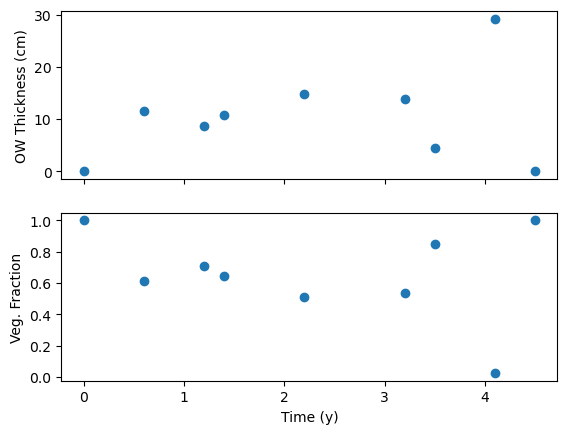

In [37]:
# time series of events. first entry is zero, last entry is end of model run
owt = [0., .6, 1.2, 1.4, 2.2, 3.2, 3.5, 4.1, 4.5]
etype = np.zeros_like(owt).astype('int')
etype[3] = 1
now = len(owt)
# random overwash thickness for each event
#owthick = np.random.normal(loc=12.0, scale=10.0, size=now)
owthick[0] = 0.
owthick[-1] = 0.
owthick[owthick<0]=0.
Wt = W_thick( owthick, max_thick=30 )

fig, axs = plt.subplots(2,1,sharex=True)
axs[0].plot(owt,owthick,'o')
axs[0].set_ylabel('OW Thickness (cm)')
axs[1].plot(owt,Wt,'o')
axs[1].set_ylabel('Veg. Fraction')
axs[1].set_xlabel('Time (y)')

C:\Users\csherwood\AppData\Local\Temp\1\ipykernel_17600\2910498979.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axs[0].plot(owt[int(np.argwhere(etype==1))], owthick[int(np.argwhere(etype==1))], 'or')


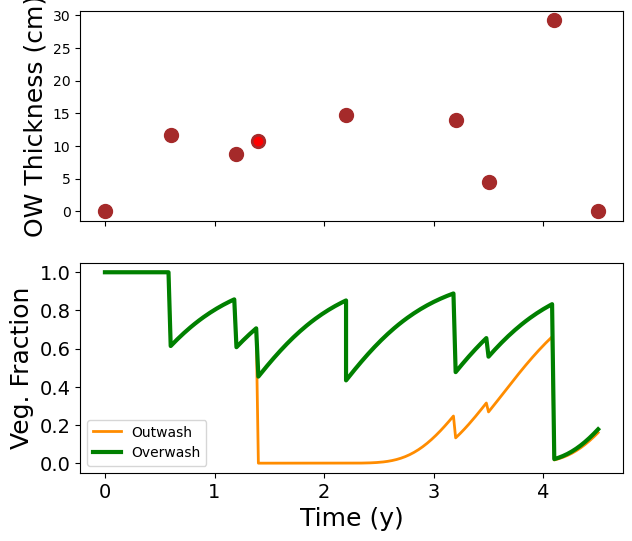

In [55]:
# run without outwash
etype = np.zeros_like(owt).astype('int')
t, W = integrate_W( owt, Wt, etype )

# run with washout
etype_out = etype
etype_out[3]=1
t, Wout = integrate_W( owt, Wt, etype_out )
ts2 = ', Mean W: {:2f}'.format(np.mean(W))
ts1 = ', Mean W: {:2f}'.format(np.mean(Wout))

fig, axs = plt.subplots(2,1, sharex = True, figsize=(7,6))
axs[0].plot(owt,owthick,'o',markersize=10, c='brown')
axs[0].plot(owt[int(np.argwhere(etype==1))], owthick[int(np.argwhere(etype==1))], 'or')
axs[0].set_ylabel('OW Thickness (cm)', fontsize=18)
axs[1].plot(t,Wout,'-',c='darkorange',linewidth=2,label='Outwash')
axs[1].plot(t,W,c='green',linewidth=3,label='Overwash')

axs[1].set_ylabel('Veg. Fraction',fontsize=18)
axs[1].set_xlabel('Time (y)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower left')
plt.savefig(ddir+'growth_model_ts.png',bbox_inches='tight',dpi=200)